In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

%matplotlib inline

label = cv2.imread("data/labels/_AqYLgHr86zSfBZ7uDnQAg.png", 0)

h, w = label.shape
pred = label[:, ::-1]
        
batch_pred = np.tile(pred, [3, 1, 1])
batch_label = np.tile(label, [3, 1, 1])

batch_pred = torch.tensor(batch_pred)
batch_label = torch.tensor(batch_label)

print(jaccard_similarity(batch_pred, batch_label))

tensor(0.4026)


In [13]:
def jaccard_similarity(logits, targets, eps=1e-4):
    predictions = torch.sigmoid(logits)

    intersection_sum = torch.sum(predictions * targets, axis=(1,2))
    union_sum = torch.sum(predictions + targets, axis=(1,2))

    jaccard_losses = 1 - ((intersection_sum + eps) / (union_sum + eps))

    return torch.mean(jaccard_losses)

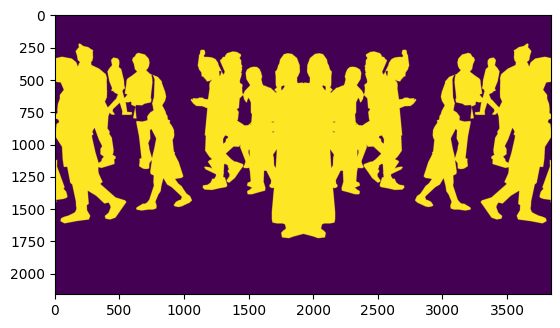

In [17]:
plt.imshow(np.logical_or(pred, label))